In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Problem Set 1

### Problem 1

In [5]:
A = np.array([[0.97, -1.37, 0.69],
              [0.31, -0.84, 0.60],
              [0.32, -0.55, 0.57]])

In [6]:
b = np.array([3, -2, 0.75])

Problem 1.1

In [7]:
np.linalg.eigvals(A)

array([ 0.8065684 ,  0.29840388, -0.40497228])

Problem 1.2

In [8]:
x0 = np.ones_like(b)

def find_fixed_point(A, b, x0):
    
    diff = 1e3
    tol = 1e-4
    maxiter = 100
    i = 0
    x = x0
    
    while i < maxiter and diff > tol:
        x_new = A @ x + b
        diff = np.linalg.norm(x_new - x)
        x = x_new
        i += 1
        
    if diff > tol:
        print('Did not converge')
    else:
        print(f'Converged after {i} iterations')
        
    return x

In [9]:
find_fixed_point(A, b, x0)

Converged after 53 iterations


array([29.56119238,  8.21104593, 13.2406335 ])

Problem 1.3

In [10]:
def sim_path(A, b, x0, n):
    
    x = np.empty((len(b), n))
    x[:, 0] = x0
    
    for t in range(1, n):
        x[:, t] = A @ x[:, t-1] + b
        
    return x

Problem 1.4

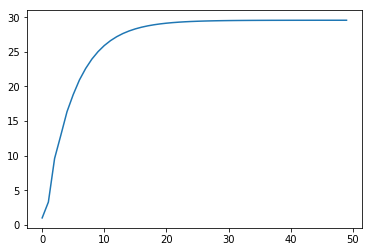

In [11]:
plt.plot(sim_path(A, b, x0, 50)[0])
plt.show()

### Problem 2

Problem 2.1

In [12]:
%%time
from scipy.optimize import minimize

def f(args):
    x, y = args
    return 100 * (y - x**2)**2 + (1 - x)**2

minimize(f, [0, 0])

CPU times: user 155 ms, sys: 83.8 ms, total: 239 ms
Wall time: 273 ms


Problem 2.2

In [13]:
%%time
n = 500
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
grid = np.empty((n, n))
current_min = 1e3
current_args = [0, 0]

for i, x_i in enumerate(x):
    for j, y_j in enumerate(y):
        temp = f([x_i, y_j])
        if temp < current_min:
            current_min = temp
            current_args = [x_i, y_j]
            
print(f'{current_min} at {current_args}')

0.001635386357896996 at [1.0040080160320644, 1.0040080160320644]
CPU times: user 364 ms, sys: 6.61 ms, total: 370 ms
Wall time: 370 ms


### Problem 3

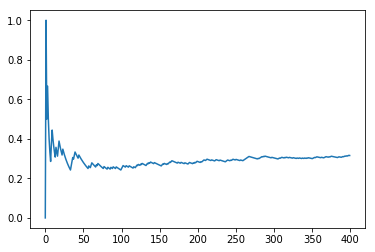

In [14]:
from scipy.stats import bernoulli

N = 400
p = 0.3

sim = bernoulli(0.3).rvs(N)
means = np.empty(N)

for i in range(1, N):
    means[i] = np.mean(sim[:i])
    
plt.plot(means)
plt.show()

### Problem 4

Problem 4.1

The optimal allocation is given by

$$
c_1^* = \frac{m}{p_1} \big( \frac{a_1}{a_1 + a_2} \big) \\
c_2^* = \frac{m}{p_2} \big( \frac{a_2}{a_1 + a_2} \big)
$$

Problem 4.2

In [15]:
def U(c1, c2, α1, α2):
    return α1 * np.log(c1) + α2 * np.log(c2)

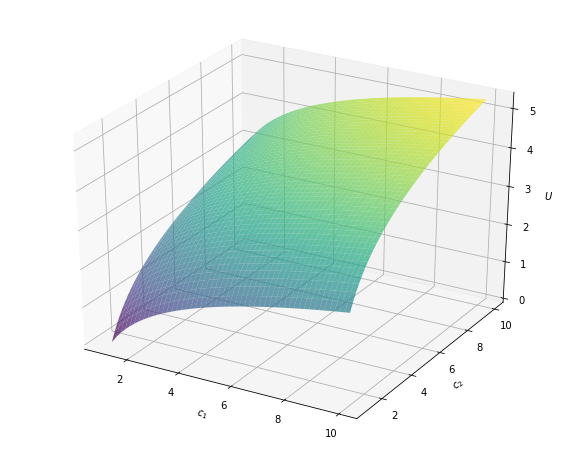

In [141]:
from mpl_toolkits import mplot3d

α1, α2 = 1.3, 1

c1 = np.linspace(1, 10, 50)
c2 = np.linspace(1, 10, 50)

X, Y = np.meshgrid(c1, c2)
Z = U(X, Y, α1, α2)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.T, cmap='viridis', alpha=0.7)
ax.set_xlabel('$c_1$')
ax.set_ylabel('$c_2$')
ax.set_zlabel('$U$')

plt.show()

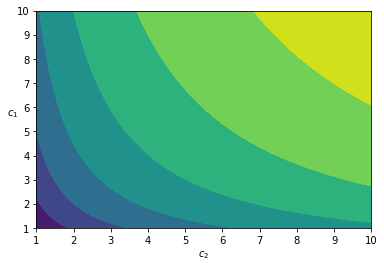

In [140]:
plt.contourf(X, Y, Z)
plt.xlabel('$c_2$')
plt.ylabel('$c_1$', rotation=0)
plt.show()

Problem 4.3

In [123]:
m = 15
α1, α2 = 1.3, 1
p1, p2 = 2, 2
c1_star = (m / p1) * (α1 / (α1 + α2))
c2_star = (m / p2) * (α2 / (α1 + α2))
U_opt = U(c1_star, c2_star, α1, α2)

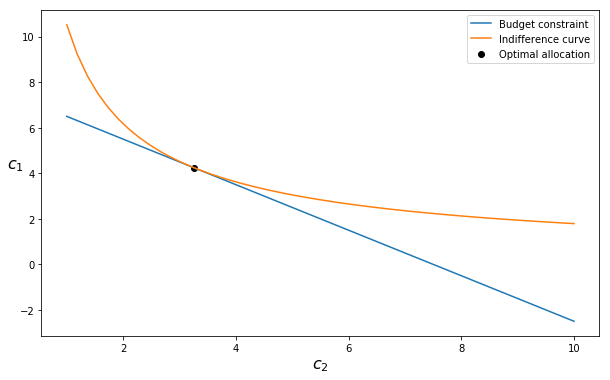

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(c2, (m - p2 * c2) / p1, label='Budget constraint')
plt.plot(c2, np.exp((U_opt - α2 * np.log(c2)) / α1), label='Indifference curve')
plt.scatter(c2_star, c1_star, color='k', label='Optimal allocation')
plt.legend()
plt.xlabel('$c_2$', fontsize=16)
plt.ylabel('$c_1$', rotation=0, fontsize=16)
plt.show()

In [ ]:
U